In [4]:
%config Completer.use_jedi = False
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout, Flatten
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sb

#importing the dataframe
df = pd.read_csv("IW.csv")

kf = StratifiedKFold(n_splits=10) #defining how many folds we will use  

#Spliting the array into the inputs we want to have in the neural network and the result we would like to get
data = np.array(df.iloc[:,0:3])
classes = np.array(df['result'])

fold = 0
train_acc = 0
test_acc = 0
 
#impementing the 10 fold cross validation
for train, test in kf.split(data,classes):
    fold+=1
    print(f"Fold #{fold}")
    #spliting the data and the labels into train sets and test sets 
    data_train =  data[train]
    data_test = data[test]
    train_labels1 = classes[train]
    test_labels1 = classes[test]


    #implementing one-hot encoding for the 0,1,2 classes
    train_labels = pd.get_dummies(train_labels1, prefix="result")
    test_labels = pd.get_dummies(test_labels1, prefix="result")
    
    #Building our neural network model
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (3,1)), #Adding the input layer
        keras.layers.Dense(3,activation='sigmoid') #Adding the output layer with three neurals and a sigmoid activation function
        ])
    
    learning_rate = 0.001
    opt = optimizers.Adam(learning_rate)
    
    #Configuring the model for training
    model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"] )
    #Using the cpu to train the model
    with tf.device('/CPU:0'):    
        history = model.fit(data_train,train_labels,batch_size = 221, epochs=200, validation_data = (data_test, test_labels))
    
    #Printing the train and test accuracy per epoch
    print("\nTrain split:")
    train_loss, train_accuracy = model.evaluate(data_train, train_labels, verbose= 1)
    print("Accuracy : {}".format(train_accuracy))
    
    print("\nTest split:")
    test_loss, test_accuracy = model.evaluate(data_test, test_labels, verbose= 2)
    print("Accuracy : {}".format(test_accuracy))
    

    train_acc = train_acc + train_accuracy
    test_acc = test_acc + test_accuracy

#Printing the final train and the test accuracy by taking the average sum of every epoch
print("\nThe final train accuracy is:{} ".format(train_acc/10))
print("\nThe final test accuracy is:{} ".format(test_acc/10))

Fold #1
Epoch 1/200
92/92 [==============================] - 0s 1ms/step - loss: 2.3689 - accuracy: 0.2529 - val_loss: 1.9776 - val_accuracy: 0.2531
Epoch 2/200
92/92 [==============================] - 0s 711us/step - loss: 1.7262 - accuracy: 0.2500 - val_loss: 1.4858 - val_accuracy: 0.2469
Epoch 3/200
92/92 [==============================] - 0s 566us/step - loss: 1.3398 - accuracy: 0.2590 - val_loss: 1.2129 - val_accuracy: 0.2743
Epoch 4/200
92/92 [==============================] - 0s 554us/step - loss: 1.1446 - accuracy: 0.3584 - val_loss: 1.0875 - val_accuracy: 0.4779
Epoch 5/200
92/92 [==============================] - 0s 544us/step - loss: 1.0623 - accuracy: 0.5087 - val_loss: 1.0405 - val_accuracy: 0.5159
Epoch 6/200
92/92 [==============================] - 0s 566us/step - loss: 1.0310 - accuracy: 0.5261 - val_loss: 1.0225 - val_accuracy: 0.5230
Epoch 7/200
92/92 [==============================] - 0s 550us/step - loss: 1.0158 - accuracy: 0.5309 - val_loss: 1.0117 - val_accuracy: 

Epoch 58/200
92/92 [==============================] - 0s 566us/step - loss: 0.9758 - accuracy: 0.5300 - val_loss: 0.9836 - val_accuracy: 0.5239
Epoch 59/200
92/92 [==============================] - 0s 564us/step - loss: 0.9759 - accuracy: 0.5296 - val_loss: 0.9837 - val_accuracy: 0.5288
Epoch 60/200
92/92 [==============================] - 0s 565us/step - loss: 0.9760 - accuracy: 0.5298 - val_loss: 0.9835 - val_accuracy: 0.5248
Epoch 61/200
92/92 [==============================] - 0s 555us/step - loss: 0.9759 - accuracy: 0.5291 - val_loss: 0.9836 - val_accuracy: 0.5252
Epoch 62/200
92/92 [==============================] - 0s 555us/step - loss: 0.9759 - accuracy: 0.5305 - val_loss: 0.9835 - val_accuracy: 0.5261
Epoch 63/200
92/92 [==============================] - 0s 550us/step - loss: 0.9757 - accuracy: 0.5305 - val_loss: 0.9837 - val_accuracy: 0.5279
Epoch 64/200
92/92 [==============================] - 0s 565us/step - loss: 0.9758 - accuracy: 0.5306 - val_loss: 0.9835 - val_accuracy:

Epoch 115/200
92/92 [==============================] - 0s 555us/step - loss: 0.9753 - accuracy: 0.5299 - val_loss: 0.9836 - val_accuracy: 0.5235
Epoch 116/200
92/92 [==============================] - 0s 565us/step - loss: 0.9753 - accuracy: 0.5310 - val_loss: 0.9836 - val_accuracy: 0.5221
Epoch 117/200
92/92 [==============================] - 0s 543us/step - loss: 0.9753 - accuracy: 0.5306 - val_loss: 0.9837 - val_accuracy: 0.5221
Epoch 118/200
92/92 [==============================] - 0s 566us/step - loss: 0.9753 - accuracy: 0.5306 - val_loss: 0.9836 - val_accuracy: 0.5226
Epoch 119/200
92/92 [==============================] - 0s 550us/step - loss: 0.9752 - accuracy: 0.5306 - val_loss: 0.9839 - val_accuracy: 0.5226
Epoch 120/200
92/92 [==============================] - 0s 554us/step - loss: 0.9752 - accuracy: 0.5305 - val_loss: 0.9837 - val_accuracy: 0.5226
Epoch 121/200
92/92 [==============================] - 0s 554us/step - loss: 0.9752 - accuracy: 0.5310 - val_loss: 0.9836 - val_ac

92/92 [==============================] - 0s 555us/step - loss: 0.9750 - accuracy: 0.5305 - val_loss: 0.9841 - val_accuracy: 0.5265
Epoch 172/200
92/92 [==============================] - 0s 554us/step - loss: 0.9748 - accuracy: 0.5312 - val_loss: 0.9836 - val_accuracy: 0.5217
Epoch 173/200
92/92 [==============================] - 0s 566us/step - loss: 0.9748 - accuracy: 0.5299 - val_loss: 0.9835 - val_accuracy: 0.5226
Epoch 174/200
92/92 [==============================] - 0s 603us/step - loss: 0.9750 - accuracy: 0.5305 - val_loss: 0.9836 - val_accuracy: 0.5217
Epoch 175/200
92/92 [==============================] - 0s 566us/step - loss: 0.9749 - accuracy: 0.5309 - val_loss: 0.9836 - val_accuracy: 0.5217
Epoch 176/200
92/92 [==============================] - 0s 543us/step - loss: 0.9750 - accuracy: 0.5303 - val_loss: 0.9836 - val_accuracy: 0.5226
Epoch 177/200
92/92 [==============================] - 0s 576us/step - loss: 0.9748 - accuracy: 0.5307 - val_loss: 0.9841 - val_accuracy: 0.5248

92/92 [==============================] - 0s 554us/step - loss: 0.9765 - accuracy: 0.5283 - val_loss: 0.9755 - val_accuracy: 0.5305
Epoch 27/200
92/92 [==============================] - 0s 576us/step - loss: 0.9764 - accuracy: 0.5273 - val_loss: 0.9749 - val_accuracy: 0.5354
Epoch 28/200
92/92 [==============================] - 0s 587us/step - loss: 0.9765 - accuracy: 0.5275 - val_loss: 0.9751 - val_accuracy: 0.5336
Epoch 29/200
92/92 [==============================] - 0s 572us/step - loss: 0.9764 - accuracy: 0.5278 - val_loss: 0.9750 - val_accuracy: 0.5336
Epoch 30/200
92/92 [==============================] - 0s 577us/step - loss: 0.9763 - accuracy: 0.5283 - val_loss: 0.9752 - val_accuracy: 0.5305
Epoch 31/200
92/92 [==============================] - 0s 555us/step - loss: 0.9764 - accuracy: 0.5280 - val_loss: 0.9757 - val_accuracy: 0.5292
Epoch 32/200
92/92 [==============================] - 0s 561us/step - loss: 0.9765 - accuracy: 0.5282 - val_loss: 0.9755 - val_accuracy: 0.5305
Epoch

Epoch 83/200
92/92 [==============================] - 0s 568us/step - loss: 0.9757 - accuracy: 0.5284 - val_loss: 0.9742 - val_accuracy: 0.5354
Epoch 84/200
92/92 [==============================] - 0s 566us/step - loss: 0.9757 - accuracy: 0.5285 - val_loss: 0.9743 - val_accuracy: 0.5305
Epoch 85/200
92/92 [==============================] - 0s 566us/step - loss: 0.9757 - accuracy: 0.5276 - val_loss: 0.9742 - val_accuracy: 0.5354
Epoch 86/200
92/92 [==============================] - 0s 566us/step - loss: 0.9757 - accuracy: 0.5279 - val_loss: 0.9744 - val_accuracy: 0.5354
Epoch 87/200
92/92 [==============================] - 0s 587us/step - loss: 0.9758 - accuracy: 0.5281 - val_loss: 0.9742 - val_accuracy: 0.5341
Epoch 88/200
92/92 [==============================] - 0s 553us/step - loss: 0.9756 - accuracy: 0.5282 - val_loss: 0.9742 - val_accuracy: 0.5354
Epoch 89/200
92/92 [==============================] - 0s 550us/step - loss: 0.9757 - accuracy: 0.5279 - val_loss: 0.9741 - val_accuracy:

92/92 [==============================] - 0s 565us/step - loss: 0.9752 - accuracy: 0.5280 - val_loss: 0.9737 - val_accuracy: 0.5354
Epoch 140/200
92/92 [==============================] - 0s 566us/step - loss: 0.9753 - accuracy: 0.5281 - val_loss: 0.9738 - val_accuracy: 0.5345
Epoch 141/200
92/92 [==============================] - 0s 566us/step - loss: 0.9752 - accuracy: 0.5286 - val_loss: 0.9736 - val_accuracy: 0.5345
Epoch 142/200
92/92 [==============================] - 0s 579us/step - loss: 0.9751 - accuracy: 0.5281 - val_loss: 0.9738 - val_accuracy: 0.5336
Epoch 143/200
92/92 [==============================] - 0s 590us/step - loss: 0.9752 - accuracy: 0.5286 - val_loss: 0.9739 - val_accuracy: 0.5345
Epoch 144/200
92/92 [==============================] - 0s 587us/step - loss: 0.9752 - accuracy: 0.5288 - val_loss: 0.9739 - val_accuracy: 0.5336
Epoch 145/200
92/92 [==============================] - 0s 566us/step - loss: 0.9752 - accuracy: 0.5286 - val_loss: 0.9736 - val_accuracy: 0.5354

92/92 [==============================] - 0s 565us/step - loss: 0.9749 - accuracy: 0.5282 - val_loss: 0.9733 - val_accuracy: 0.5354
Epoch 196/200
92/92 [==============================] - 0s 554us/step - loss: 0.9749 - accuracy: 0.5284 - val_loss: 0.9734 - val_accuracy: 0.5341
Epoch 197/200
92/92 [==============================] - 0s 555us/step - loss: 0.9749 - accuracy: 0.5279 - val_loss: 0.9734 - val_accuracy: 0.5354
Epoch 198/200
92/92 [==============================] - 0s 550us/step - loss: 0.9748 - accuracy: 0.5283 - val_loss: 0.9733 - val_accuracy: 0.5354
Epoch 199/200
92/92 [==============================] - 0s 554us/step - loss: 0.9749 - accuracy: 0.5285 - val_loss: 0.9734 - val_accuracy: 0.5354
Epoch 200/200
92/92 [==============================] - 0s 576us/step - loss: 0.9749 - accuracy: 0.5283 - val_loss: 0.9732 - val_accuracy: 0.5354

Train split:
636/636 [==============================] - 0s 343us/step - loss: 0.9747 - accuracy: 0.5288
Accuracy : 0.528821587562561

Test spli

93/93 [==============================] - 0s 613us/step - loss: 0.9722 - accuracy: 0.5298 - val_loss: 1.0034 - val_accuracy: 0.5237
Epoch 51/200
93/93 [==============================] - 0s 635us/step - loss: 0.9723 - accuracy: 0.5286 - val_loss: 1.0035 - val_accuracy: 0.5228
Epoch 52/200
93/93 [==============================] - 0s 603us/step - loss: 0.9722 - accuracy: 0.5299 - val_loss: 1.0031 - val_accuracy: 0.5232
Epoch 53/200
93/93 [==============================] - 0s 513us/step - loss: 0.9723 - accuracy: 0.5290 - val_loss: 1.0028 - val_accuracy: 0.5232
Epoch 54/200
93/93 [==============================] - 0s 642us/step - loss: 0.9725 - accuracy: 0.5302 - val_loss: 1.0032 - val_accuracy: 0.5232
Epoch 55/200
93/93 [==============================] - 0s 600us/step - loss: 0.9722 - accuracy: 0.5295 - val_loss: 1.0034 - val_accuracy: 0.5232
Epoch 56/200
93/93 [==============================] - 0s 639us/step - loss: 0.9722 - accuracy: 0.5297 - val_loss: 1.0035 - val_accuracy: 0.5224
Epoch

Epoch 107/200
93/93 [==============================] - 0s 620us/step - loss: 0.9721 - accuracy: 0.5308 - val_loss: 1.0031 - val_accuracy: 0.5232
Epoch 108/200
93/93 [==============================] - 0s 613us/step - loss: 0.9719 - accuracy: 0.5298 - val_loss: 1.0031 - val_accuracy: 0.5246
Epoch 109/200
93/93 [==============================] - 0s 609us/step - loss: 0.9728 - accuracy: 0.5293 - val_loss: 1.0028 - val_accuracy: 0.5219
Epoch 110/200
93/93 [==============================] - 0s 633us/step - loss: 0.9721 - accuracy: 0.5291 - val_loss: 1.0027 - val_accuracy: 0.5237
Epoch 111/200
93/93 [==============================] - 0s 600us/step - loss: 0.9721 - accuracy: 0.5296 - val_loss: 1.0037 - val_accuracy: 0.5232
Epoch 112/200
93/93 [==============================] - 0s 618us/step - loss: 0.9725 - accuracy: 0.5291 - val_loss: 1.0035 - val_accuracy: 0.5232
Epoch 113/200
93/93 [==============================] - 0s 604us/step - loss: 0.9721 - accuracy: 0.5287 - val_loss: 1.0033 - val_ac

93/93 [==============================] - 0s 664us/step - loss: 0.9721 - accuracy: 0.5279 - val_loss: 1.0029 - val_accuracy: 0.5232
Epoch 164/200
93/93 [==============================] - 0s 580us/step - loss: 0.9718 - accuracy: 0.5301 - val_loss: 1.0024 - val_accuracy: 0.5250
Epoch 165/200
93/93 [==============================] - 0s 656us/step - loss: 0.9718 - accuracy: 0.5295 - val_loss: 1.0028 - val_accuracy: 0.5246
Epoch 166/200
93/93 [==============================] - 0s 577us/step - loss: 0.9718 - accuracy: 0.5306 - val_loss: 1.0030 - val_accuracy: 0.5232
Epoch 167/200
93/93 [==============================] - 0s 634us/step - loss: 0.9721 - accuracy: 0.5297 - val_loss: 1.0024 - val_accuracy: 0.5224
Epoch 168/200
93/93 [==============================] - 0s 600us/step - loss: 0.9720 - accuracy: 0.5314 - val_loss: 1.0024 - val_accuracy: 0.5237
Epoch 169/200
93/93 [==============================] - 0s 623us/step - loss: 0.9718 - accuracy: 0.5295 - val_loss: 1.0028 - val_accuracy: 0.5232

93/93 [==============================] - 0s 595us/step - loss: 1.0736 - accuracy: 0.3819 - val_loss: 1.0833 - val_accuracy: 0.3621
Epoch 19/200
93/93 [==============================] - 0s 648us/step - loss: 1.0735 - accuracy: 0.3847 - val_loss: 1.0831 - val_accuracy: 0.3763
Epoch 20/200
93/93 [==============================] - 0s 586us/step - loss: 1.0733 - accuracy: 0.3971 - val_loss: 1.0828 - val_accuracy: 0.3927
Epoch 21/200
93/93 [==============================] - 0s 644us/step - loss: 1.0731 - accuracy: 0.4089 - val_loss: 1.0825 - val_accuracy: 0.3935
Epoch 22/200
93/93 [==============================] - 0s 589us/step - loss: 1.0728 - accuracy: 0.4190 - val_loss: 1.0821 - val_accuracy: 0.4019
Epoch 23/200
93/93 [==============================] - 0s 629us/step - loss: 1.0726 - accuracy: 0.4321 - val_loss: 1.0818 - val_accuracy: 0.4161
Epoch 24/200
93/93 [==============================] - 0s 604us/step - loss: 1.0724 - accuracy: 0.4362 - val_loss: 1.0815 - val_accuracy: 0.4228
Epoch

Epoch 75/200
93/93 [==============================] - 0s 628us/step - loss: 0.9753 - accuracy: 0.5313 - val_loss: 1.0041 - val_accuracy: 0.5064
Epoch 76/200
93/93 [==============================] - 0s 594us/step - loss: 0.9749 - accuracy: 0.5315 - val_loss: 1.0041 - val_accuracy: 0.5060
Epoch 77/200
93/93 [==============================] - 0s 598us/step - loss: 0.9750 - accuracy: 0.5306 - val_loss: 1.0042 - val_accuracy: 0.5126
Epoch 78/200
93/93 [==============================] - 0s 592us/step - loss: 0.9748 - accuracy: 0.5313 - val_loss: 1.0042 - val_accuracy: 0.5069
Epoch 79/200
93/93 [==============================] - 0s 603us/step - loss: 0.9748 - accuracy: 0.5305 - val_loss: 1.0042 - val_accuracy: 0.5126
Epoch 80/200
93/93 [==============================] - 0s 598us/step - loss: 0.9748 - accuracy: 0.5310 - val_loss: 1.0043 - val_accuracy: 0.5126
Epoch 81/200
93/93 [==============================] - 0s 570us/step - loss: 0.9748 - accuracy: 0.5313 - val_loss: 1.0042 - val_accuracy:

Epoch 132/200
93/93 [==============================] - 0s 592us/step - loss: 0.9742 - accuracy: 0.5315 - val_loss: 1.0037 - val_accuracy: 0.5122
Epoch 133/200
93/93 [==============================] - 0s 587us/step - loss: 0.9741 - accuracy: 0.5323 - val_loss: 1.0037 - val_accuracy: 0.5064
Epoch 134/200
93/93 [==============================] - 0s 603us/step - loss: 0.9743 - accuracy: 0.5313 - val_loss: 1.0038 - val_accuracy: 0.5064
Epoch 135/200
93/93 [==============================] - 0s 598us/step - loss: 0.9744 - accuracy: 0.5311 - val_loss: 1.0037 - val_accuracy: 0.5108
Epoch 136/200
93/93 [==============================] - 0s 570us/step - loss: 0.9742 - accuracy: 0.5314 - val_loss: 1.0037 - val_accuracy: 0.5064
Epoch 137/200
93/93 [==============================] - 0s 638us/step - loss: 0.9742 - accuracy: 0.5311 - val_loss: 1.0038 - val_accuracy: 0.5108
Epoch 138/200
93/93 [==============================] - 0s 584us/step - loss: 0.9742 - accuracy: 0.5308 - val_loss: 1.0038 - val_ac

93/93 [==============================] - 0s 595us/step - loss: 0.9743 - accuracy: 0.5324 - val_loss: 1.0034 - val_accuracy: 0.5113
Epoch 189/200
93/93 [==============================] - 0s 560us/step - loss: 0.9738 - accuracy: 0.5323 - val_loss: 1.0034 - val_accuracy: 0.5117
Epoch 190/200
93/93 [==============================] - 0s 652us/step - loss: 0.9737 - accuracy: 0.5322 - val_loss: 1.0036 - val_accuracy: 0.5113
Epoch 191/200
93/93 [==============================] - 0s 582us/step - loss: 0.9738 - accuracy: 0.5316 - val_loss: 1.0036 - val_accuracy: 0.5117
Epoch 192/200
93/93 [==============================] - 0s 652us/step - loss: 0.9741 - accuracy: 0.5314 - val_loss: 1.0036 - val_accuracy: 0.5117
Epoch 193/200
93/93 [==============================] - 0s 598us/step - loss: 0.9736 - accuracy: 0.5322 - val_loss: 1.0034 - val_accuracy: 0.5117
Epoch 194/200
93/93 [==============================] - 0s 624us/step - loss: 0.9737 - accuracy: 0.5318 - val_loss: 1.0033 - val_accuracy: 0.5117

93/93 [==============================] - 0s 611us/step - loss: 0.9764 - accuracy: 0.5322 - val_loss: 0.9929 - val_accuracy: 0.5113
Epoch 44/200
93/93 [==============================] - 0s 589us/step - loss: 0.9761 - accuracy: 0.5301 - val_loss: 0.9929 - val_accuracy: 0.5184
Epoch 45/200
93/93 [==============================] - 0s 604us/step - loss: 0.9762 - accuracy: 0.5292 - val_loss: 0.9928 - val_accuracy: 0.5117
Epoch 46/200
93/93 [==============================] - 0s 585us/step - loss: 0.9759 - accuracy: 0.5305 - val_loss: 0.9928 - val_accuracy: 0.5113
Epoch 47/200
93/93 [==============================] - 0s 570us/step - loss: 0.9758 - accuracy: 0.5304 - val_loss: 0.9928 - val_accuracy: 0.5188
Epoch 48/200
93/93 [==============================] - 0s 629us/step - loss: 0.9759 - accuracy: 0.5314 - val_loss: 0.9927 - val_accuracy: 0.5113
Epoch 49/200
93/93 [==============================] - 0s 605us/step - loss: 0.9763 - accuracy: 0.5286 - val_loss: 0.9924 - val_accuracy: 0.5117
Epoch

Epoch 100/200
93/93 [==============================] - 0s 616us/step - loss: 0.9745 - accuracy: 0.5307 - val_loss: 0.9899 - val_accuracy: 0.5206
Epoch 101/200
93/93 [==============================] - 0s 596us/step - loss: 0.9745 - accuracy: 0.5311 - val_loss: 0.9899 - val_accuracy: 0.5197
Epoch 102/200
93/93 [==============================] - 0s 603us/step - loss: 0.9744 - accuracy: 0.5303 - val_loss: 0.9900 - val_accuracy: 0.5197
Epoch 103/200
93/93 [==============================] - 0s 586us/step - loss: 0.9745 - accuracy: 0.5313 - val_loss: 0.9901 - val_accuracy: 0.5193
Epoch 104/200
93/93 [==============================] - 0s 560us/step - loss: 0.9743 - accuracy: 0.5317 - val_loss: 0.9901 - val_accuracy: 0.5197
Epoch 105/200
93/93 [==============================] - 0s 657us/step - loss: 0.9746 - accuracy: 0.5310 - val_loss: 0.9900 - val_accuracy: 0.5197
Epoch 106/200
93/93 [==============================] - 0s 575us/step - loss: 0.9745 - accuracy: 0.5305 - val_loss: 0.9900 - val_ac

93/93 [==============================] - 0s 594us/step - loss: 0.9740 - accuracy: 0.5304 - val_loss: 0.9896 - val_accuracy: 0.5197
Epoch 157/200
93/93 [==============================] - 0s 603us/step - loss: 0.9742 - accuracy: 0.5311 - val_loss: 0.9897 - val_accuracy: 0.5179
Epoch 158/200
93/93 [==============================] - 0s 598us/step - loss: 0.9748 - accuracy: 0.5292 - val_loss: 0.9895 - val_accuracy: 0.5179
Epoch 159/200
93/93 [==============================] - 0s 581us/step - loss: 0.9741 - accuracy: 0.5309 - val_loss: 0.9896 - val_accuracy: 0.5184
Epoch 160/200
93/93 [==============================] - 0s 639us/step - loss: 0.9740 - accuracy: 0.5315 - val_loss: 0.9896 - val_accuracy: 0.5201
Epoch 161/200
93/93 [==============================] - 0s 584us/step - loss: 0.9743 - accuracy: 0.5314 - val_loss: 0.9896 - val_accuracy: 0.5188
Epoch 162/200
93/93 [==============================] - 0s 663us/step - loss: 0.9742 - accuracy: 0.5305 - val_loss: 0.9895 - val_accuracy: 0.5179

93/93 [==============================] - 0s 613us/step - loss: 0.9828 - accuracy: 0.5294 - val_loss: 0.9754 - val_accuracy: 0.5370
Epoch 12/200
93/93 [==============================] - 0s 610us/step - loss: 0.9809 - accuracy: 0.5287 - val_loss: 0.9753 - val_accuracy: 0.5365
Epoch 13/200
93/93 [==============================] - 0s 598us/step - loss: 0.9799 - accuracy: 0.5290 - val_loss: 0.9751 - val_accuracy: 0.5378
Epoch 14/200
93/93 [==============================] - 0s 603us/step - loss: 0.9794 - accuracy: 0.5290 - val_loss: 0.9751 - val_accuracy: 0.5392
Epoch 15/200
93/93 [==============================] - 0s 560us/step - loss: 0.9789 - accuracy: 0.5286 - val_loss: 0.9750 - val_accuracy: 0.5414
Epoch 16/200
93/93 [==============================] - 0s 657us/step - loss: 0.9787 - accuracy: 0.5290 - val_loss: 0.9751 - val_accuracy: 0.5423
Epoch 17/200
93/93 [==============================] - 0s 576us/step - loss: 0.9786 - accuracy: 0.5287 - val_loss: 0.9752 - val_accuracy: 0.5418
Epoch

Epoch 68/200
93/93 [==============================] - 0s 599us/step - loss: 0.9761 - accuracy: 0.5280 - val_loss: 0.9730 - val_accuracy: 0.5392
Epoch 69/200
93/93 [==============================] - 0s 614us/step - loss: 0.9767 - accuracy: 0.5286 - val_loss: 0.9731 - val_accuracy: 0.5378
Epoch 70/200
93/93 [==============================] - 0s 619us/step - loss: 0.9763 - accuracy: 0.5273 - val_loss: 0.9731 - val_accuracy: 0.5396
Epoch 71/200
93/93 [==============================] - 0s 632us/step - loss: 0.9759 - accuracy: 0.5276 - val_loss: 0.9728 - val_accuracy: 0.5370
Epoch 72/200
93/93 [==============================] - 0s 601us/step - loss: 0.9761 - accuracy: 0.5267 - val_loss: 0.9727 - val_accuracy: 0.5370
Epoch 73/200
93/93 [==============================] - 0s 632us/step - loss: 0.9760 - accuracy: 0.5275 - val_loss: 0.9726 - val_accuracy: 0.5374
Epoch 74/200
93/93 [==============================] - 0s 601us/step - loss: 0.9758 - accuracy: 0.5282 - val_loss: 0.9723 - val_accuracy:

Epoch 125/200
93/93 [==============================] - 0s 610us/step - loss: 0.9757 - accuracy: 0.5268 - val_loss: 0.9726 - val_accuracy: 0.5374
Epoch 126/200
93/93 [==============================] - 0s 626us/step - loss: 0.9756 - accuracy: 0.5271 - val_loss: 0.9725 - val_accuracy: 0.5374
Epoch 127/200
93/93 [==============================] - 0s 607us/step - loss: 0.9755 - accuracy: 0.5276 - val_loss: 0.9729 - val_accuracy: 0.5383
Epoch 128/200
93/93 [==============================] - 0s 612us/step - loss: 0.9755 - accuracy: 0.5275 - val_loss: 0.9727 - val_accuracy: 0.5401
Epoch 129/200
93/93 [==============================] - 0s 588us/step - loss: 0.9756 - accuracy: 0.5284 - val_loss: 0.9723 - val_accuracy: 0.5383
Epoch 130/200
93/93 [==============================] - 0s 606us/step - loss: 0.9755 - accuracy: 0.5277 - val_loss: 0.9723 - val_accuracy: 0.5401
Epoch 131/200
93/93 [==============================] - 0s 594us/step - loss: 0.9754 - accuracy: 0.5276 - val_loss: 0.9722 - val_ac

93/93 [==============================] - 0s 579us/step - loss: 0.9754 - accuracy: 0.5277 - val_loss: 0.9718 - val_accuracy: 0.5383
Epoch 182/200
93/93 [==============================] - 0s 639us/step - loss: 0.9769 - accuracy: 0.5279 - val_loss: 0.9715 - val_accuracy: 0.5387
Epoch 183/200
93/93 [==============================] - 0s 593us/step - loss: 0.9755 - accuracy: 0.5285 - val_loss: 0.9719 - val_accuracy: 0.5401
Epoch 184/200
93/93 [==============================] - 0s 637us/step - loss: 0.9752 - accuracy: 0.5280 - val_loss: 0.9718 - val_accuracy: 0.5405
Epoch 185/200
93/93 [==============================] - 0s 596us/step - loss: 0.9754 - accuracy: 0.5281 - val_loss: 0.9718 - val_accuracy: 0.5405
Epoch 186/200
93/93 [==============================] - 0s 610us/step - loss: 0.9754 - accuracy: 0.5295 - val_loss: 0.9719 - val_accuracy: 0.5401
Epoch 187/200
93/93 [==============================] - 0s 601us/step - loss: 0.9751 - accuracy: 0.5290 - val_loss: 0.9714 - val_accuracy: 0.5396

93/93 [==============================] - 0s 619us/step - loss: 0.9793 - accuracy: 0.5267 - val_loss: 0.9659 - val_accuracy: 0.5356
Epoch 35/200
93/93 [==============================] - 0s 611us/step - loss: 0.9791 - accuracy: 0.5276 - val_loss: 0.9657 - val_accuracy: 0.5370
Epoch 36/200
93/93 [==============================] - 0s 600us/step - loss: 0.9792 - accuracy: 0.5293 - val_loss: 0.9658 - val_accuracy: 0.5361
Epoch 37/200
93/93 [==============================] - 0s 611us/step - loss: 0.9790 - accuracy: 0.5286 - val_loss: 0.9657 - val_accuracy: 0.5352
Epoch 38/200
93/93 [==============================] - 0s 601us/step - loss: 0.9789 - accuracy: 0.5281 - val_loss: 0.9662 - val_accuracy: 0.5339
Epoch 39/200
93/93 [==============================] - 0s 605us/step - loss: 0.9789 - accuracy: 0.5265 - val_loss: 0.9658 - val_accuracy: 0.5361
Epoch 40/200
93/93 [==============================] - 0s 596us/step - loss: 0.9787 - accuracy: 0.5275 - val_loss: 0.9657 - val_accuracy: 0.5361
Epoch

Epoch 91/200
93/93 [==============================] - 0s 594us/step - loss: 0.9775 - accuracy: 0.5302 - val_loss: 0.9649 - val_accuracy: 0.5352
Epoch 92/200
93/93 [==============================] - 0s 630us/step - loss: 0.9772 - accuracy: 0.5281 - val_loss: 0.9642 - val_accuracy: 0.5352
Epoch 93/200
93/93 [==============================] - 0s 592us/step - loss: 0.9773 - accuracy: 0.5267 - val_loss: 0.9643 - val_accuracy: 0.5352
Epoch 94/200
93/93 [==============================] - 0s 623us/step - loss: 0.9773 - accuracy: 0.5283 - val_loss: 0.9641 - val_accuracy: 0.5361
Epoch 95/200
93/93 [==============================] - 0s 599us/step - loss: 0.9774 - accuracy: 0.5278 - val_loss: 0.9640 - val_accuracy: 0.5365
Epoch 96/200
93/93 [==============================] - 0s 613us/step - loss: 0.9772 - accuracy: 0.5285 - val_loss: 0.9639 - val_accuracy: 0.5365
Epoch 97/200
93/93 [==============================] - 0s 592us/step - loss: 0.9772 - accuracy: 0.5290 - val_loss: 0.9643 - val_accuracy:

93/93 [==============================] - 0s 592us/step - loss: 0.9767 - accuracy: 0.5288 - val_loss: 0.9635 - val_accuracy: 0.5352
Epoch 148/200
93/93 [==============================] - 0s 599us/step - loss: 0.9768 - accuracy: 0.5262 - val_loss: 0.9637 - val_accuracy: 0.5365
Epoch 149/200
93/93 [==============================] - 0s 620us/step - loss: 0.9769 - accuracy: 0.5293 - val_loss: 0.9641 - val_accuracy: 0.5339
Epoch 150/200
93/93 [==============================] - 0s 591us/step - loss: 0.9769 - accuracy: 0.5279 - val_loss: 0.9640 - val_accuracy: 0.5352
Epoch 151/200
93/93 [==============================] - 0s 598us/step - loss: 0.9769 - accuracy: 0.5263 - val_loss: 0.9632 - val_accuracy: 0.5365
Epoch 152/200
93/93 [==============================] - 0s 602us/step - loss: 0.9781 - accuracy: 0.5274 - val_loss: 0.9628 - val_accuracy: 0.5365
Epoch 153/200
93/93 [==============================] - 0s 603us/step - loss: 0.9771 - accuracy: 0.5284 - val_loss: 0.9633 - val_accuracy: 0.5352

93/93 [==============================] - 0s 673us/step - loss: 1.0034 - accuracy: 0.4992 - val_loss: 0.9673 - val_accuracy: 0.5436
Epoch 3/200
93/93 [==============================] - 0s 620us/step - loss: 0.9940 - accuracy: 0.5198 - val_loss: 0.9590 - val_accuracy: 0.5423
Epoch 4/200
93/93 [==============================] - 0s 591us/step - loss: 0.9901 - accuracy: 0.5214 - val_loss: 0.9543 - val_accuracy: 0.5436
Epoch 5/200
93/93 [==============================] - 0s 604us/step - loss: 0.9873 - accuracy: 0.5232 - val_loss: 0.9516 - val_accuracy: 0.5423
Epoch 6/200
93/93 [==============================] - 0s 586us/step - loss: 0.9854 - accuracy: 0.5249 - val_loss: 0.9509 - val_accuracy: 0.5454
Epoch 7/200
93/93 [==============================] - 0s 613us/step - loss: 0.9843 - accuracy: 0.5259 - val_loss: 0.9490 - val_accuracy: 0.5432
Epoch 8/200
93/93 [==============================] - 0s 587us/step - loss: 0.9836 - accuracy: 0.5266 - val_loss: 0.9486 - val_accuracy: 0.5440
Epoch 9/200

93/93 [==============================] - 0s 632us/step - loss: 0.9802 - accuracy: 0.5295 - val_loss: 0.9440 - val_accuracy: 0.5432
Epoch 60/200
93/93 [==============================] - 0s 580us/step - loss: 0.9805 - accuracy: 0.5296 - val_loss: 0.9440 - val_accuracy: 0.5427
Epoch 61/200
93/93 [==============================] - 0s 639us/step - loss: 0.9802 - accuracy: 0.5290 - val_loss: 0.9438 - val_accuracy: 0.5427
Epoch 62/200
93/93 [==============================] - 0s 594us/step - loss: 0.9803 - accuracy: 0.5294 - val_loss: 0.9436 - val_accuracy: 0.5436
Epoch 63/200
93/93 [==============================] - 0s 619us/step - loss: 0.9802 - accuracy: 0.5284 - val_loss: 0.9443 - val_accuracy: 0.5436
Epoch 64/200
93/93 [==============================] - 0s 603us/step - loss: 0.9803 - accuracy: 0.5283 - val_loss: 0.9443 - val_accuracy: 0.5436
Epoch 65/200
93/93 [==============================] - 0s 612us/step - loss: 0.9801 - accuracy: 0.5299 - val_loss: 0.9442 - val_accuracy: 0.5427
Epoch

Epoch 116/200
93/93 [==============================] - 0s 597us/step - loss: 0.9800 - accuracy: 0.5292 - val_loss: 0.9437 - val_accuracy: 0.5414
Epoch 117/200
93/93 [==============================] - 0s 603us/step - loss: 0.9800 - accuracy: 0.5287 - val_loss: 0.9437 - val_accuracy: 0.5414
Epoch 118/200
93/93 [==============================] - 0s 600us/step - loss: 0.9799 - accuracy: 0.5291 - val_loss: 0.9436 - val_accuracy: 0.5427
Epoch 119/200
93/93 [==============================] - 0s 609us/step - loss: 0.9796 - accuracy: 0.5294 - val_loss: 0.9434 - val_accuracy: 0.5427
Epoch 120/200
93/93 [==============================] - 0s 592us/step - loss: 0.9799 - accuracy: 0.5293 - val_loss: 0.9436 - val_accuracy: 0.5440
Epoch 121/200
93/93 [==============================] - 0s 603us/step - loss: 0.9799 - accuracy: 0.5280 - val_loss: 0.9440 - val_accuracy: 0.5440
Epoch 122/200
93/93 [==============================] - 0s 609us/step - loss: 0.9798 - accuracy: 0.5280 - val_loss: 0.9437 - val_ac

93/93 [==============================] - 0s 600us/step - loss: 0.9795 - accuracy: 0.5289 - val_loss: 0.9435 - val_accuracy: 0.5432
Epoch 173/200
93/93 [==============================] - 0s 602us/step - loss: 0.9794 - accuracy: 0.5293 - val_loss: 0.9430 - val_accuracy: 0.5414
Epoch 174/200
93/93 [==============================] - 0s 598us/step - loss: 0.9793 - accuracy: 0.5299 - val_loss: 0.9434 - val_accuracy: 0.5414
Epoch 175/200
93/93 [==============================] - 0s 608us/step - loss: 0.9795 - accuracy: 0.5285 - val_loss: 0.9431 - val_accuracy: 0.5414
Epoch 176/200
93/93 [==============================] - 0s 603us/step - loss: 0.9793 - accuracy: 0.5283 - val_loss: 0.9434 - val_accuracy: 0.5432
Epoch 177/200
93/93 [==============================] - 0s 616us/step - loss: 0.9795 - accuracy: 0.5288 - val_loss: 0.9433 - val_accuracy: 0.5414
Epoch 178/200
93/93 [==============================] - 0s 595us/step - loss: 0.9795 - accuracy: 0.5286 - val_loss: 0.9430 - val_accuracy: 0.5432

93/93 [==============================] - 0s 583us/step - loss: 1.0023 - accuracy: 0.4590 - val_loss: 1.0023 - val_accuracy: 0.4591
Epoch 28/200
93/93 [==============================] - 0s 625us/step - loss: 1.0021 - accuracy: 0.4590 - val_loss: 1.0021 - val_accuracy: 0.4591
Epoch 29/200
93/93 [==============================] - 0s 597us/step - loss: 1.0020 - accuracy: 0.4590 - val_loss: 1.0018 - val_accuracy: 0.4591
Epoch 30/200
93/93 [==============================] - 0s 605us/step - loss: 1.0019 - accuracy: 0.4590 - val_loss: 1.0016 - val_accuracy: 0.4591
Epoch 31/200
93/93 [==============================] - 0s 606us/step - loss: 1.0016 - accuracy: 0.4590 - val_loss: 1.0015 - val_accuracy: 0.4591
Epoch 32/200
93/93 [==============================] - 0s 618us/step - loss: 1.0020 - accuracy: 0.4590 - val_loss: 1.0015 - val_accuracy: 0.4591
Epoch 33/200
93/93 [==============================] - 0s 594us/step - loss: 1.0015 - accuracy: 0.4590 - val_loss: 1.0013 - val_accuracy: 0.4591
Epoch

Epoch 84/200
93/93 [==============================] - 0s 597us/step - loss: 0.9967 - accuracy: 0.5195 - val_loss: 0.9957 - val_accuracy: 0.5179
Epoch 85/200
93/93 [==============================] - 0s 607us/step - loss: 0.9961 - accuracy: 0.5192 - val_loss: 0.9952 - val_accuracy: 0.5237
Epoch 86/200
93/93 [==============================] - 0s 615us/step - loss: 0.9958 - accuracy: 0.5227 - val_loss: 0.9949 - val_accuracy: 0.5224
Epoch 87/200
93/93 [==============================] - 0s 618us/step - loss: 0.9964 - accuracy: 0.5270 - val_loss: 0.9950 - val_accuracy: 0.5246
Epoch 88/200
93/93 [==============================] - 0s 616us/step - loss: 0.9942 - accuracy: 0.5231 - val_loss: 0.9931 - val_accuracy: 0.5224
Epoch 89/200
93/93 [==============================] - 0s 622us/step - loss: 0.9933 - accuracy: 0.5247 - val_loss: 0.9917 - val_accuracy: 0.5246
Epoch 90/200
93/93 [==============================] - 0s 599us/step - loss: 0.9920 - accuracy: 0.5264 - val_loss: 0.9901 - val_accuracy:

93/93 [==============================] - 0s 613us/step - loss: 0.9764 - accuracy: 0.5296 - val_loss: 0.9681 - val_accuracy: 0.5241
Epoch 141/200
93/93 [==============================] - 0s 609us/step - loss: 0.9763 - accuracy: 0.5284 - val_loss: 0.9684 - val_accuracy: 0.5268
Epoch 142/200
93/93 [==============================] - 0s 603us/step - loss: 0.9762 - accuracy: 0.5297 - val_loss: 0.9680 - val_accuracy: 0.5241
Epoch 143/200
93/93 [==============================] - 0s 598us/step - loss: 0.9762 - accuracy: 0.5280 - val_loss: 0.9681 - val_accuracy: 0.5241
Epoch 144/200
93/93 [==============================] - 0s 559us/step - loss: 0.9762 - accuracy: 0.5293 - val_loss: 0.9685 - val_accuracy: 0.5263
Epoch 145/200
93/93 [==============================] - 0s 656us/step - loss: 0.9763 - accuracy: 0.5293 - val_loss: 0.9681 - val_accuracy: 0.5268
Epoch 146/200
93/93 [==============================] - 0s 578us/step - loss: 0.9762 - accuracy: 0.5290 - val_loss: 0.9682 - val_accuracy: 0.5268

93/93 [==============================] - 0s 591us/step - loss: 0.9759 - accuracy: 0.5295 - val_loss: 0.9681 - val_accuracy: 0.5263
Epoch 197/200
93/93 [==============================] - 0s 603us/step - loss: 0.9759 - accuracy: 0.5299 - val_loss: 0.9679 - val_accuracy: 0.5263
Epoch 198/200
93/93 [==============================] - 0s 593us/step - loss: 0.9757 - accuracy: 0.5298 - val_loss: 0.9680 - val_accuracy: 0.5263
Epoch 199/200
93/93 [==============================] - 0s 575us/step - loss: 0.9758 - accuracy: 0.5294 - val_loss: 0.9681 - val_accuracy: 0.5263
Epoch 200/200
93/93 [==============================] - 0s 637us/step - loss: 0.9758 - accuracy: 0.5294 - val_loss: 0.9677 - val_accuracy: 0.5237

Train split:
636/636 [==============================] - 0s 339us/step - loss: 0.9757 - accuracy: 0.5297
Accuracy : 0.5297300219535828

Test split:
71/71 - 0s - loss: 0.9677 - accuracy: 0.5237
Accuracy : 0.5236830711364746
Fold #10
Epoch 1/200
93/93 [==============================] - 0s 1

93/93 [==============================] - 0s 635us/step - loss: 0.9777 - accuracy: 0.5301 - val_loss: 0.9615 - val_accuracy: 0.5325
Epoch 52/200
93/93 [==============================] - 0s 624us/step - loss: 0.9777 - accuracy: 0.5301 - val_loss: 0.9612 - val_accuracy: 0.5317
Epoch 53/200
93/93 [==============================] - 0s 624us/step - loss: 0.9778 - accuracy: 0.5298 - val_loss: 0.9615 - val_accuracy: 0.5321
Epoch 54/200
93/93 [==============================] - 0s 614us/step - loss: 0.9775 - accuracy: 0.5304 - val_loss: 0.9614 - val_accuracy: 0.5321
Epoch 55/200
93/93 [==============================] - 0s 603us/step - loss: 0.9772 - accuracy: 0.5297 - val_loss: 0.9618 - val_accuracy: 0.5378
Epoch 56/200
93/93 [==============================] - 0s 613us/step - loss: 0.9775 - accuracy: 0.5304 - val_loss: 0.9619 - val_accuracy: 0.5339
Epoch 57/200
93/93 [==============================] - 0s 603us/step - loss: 0.9773 - accuracy: 0.5297 - val_loss: 0.9618 - val_accuracy: 0.5325
Epoch

Epoch 108/200
93/93 [==============================] - 0s 640us/step - loss: 0.9770 - accuracy: 0.5274 - val_loss: 0.9618 - val_accuracy: 0.5321
Epoch 109/200
93/93 [==============================] - 0s 646us/step - loss: 0.9771 - accuracy: 0.5283 - val_loss: 0.9631 - val_accuracy: 0.5321
Epoch 110/200
93/93 [==============================] - 0s 614us/step - loss: 0.9770 - accuracy: 0.5277 - val_loss: 0.9625 - val_accuracy: 0.5321
Epoch 111/200
93/93 [==============================] - 0s 688us/step - loss: 0.9769 - accuracy: 0.5287 - val_loss: 0.9629 - val_accuracy: 0.5330
Epoch 112/200
93/93 [==============================] - 0s 643us/step - loss: 0.9773 - accuracy: 0.5291 - val_loss: 0.9630 - val_accuracy: 0.5325
Epoch 113/200
93/93 [==============================] - 0s 632us/step - loss: 0.9767 - accuracy: 0.5282 - val_loss: 0.9631 - val_accuracy: 0.5321
Epoch 114/200
93/93 [==============================] - 0s 646us/step - loss: 0.9768 - accuracy: 0.5286 - val_loss: 0.9626 - val_ac

93/93 [==============================] - 0s 598us/step - loss: 0.9767 - accuracy: 0.5297 - val_loss: 0.9644 - val_accuracy: 0.5277
Epoch 165/200
93/93 [==============================] - 0s 603us/step - loss: 0.9770 - accuracy: 0.5277 - val_loss: 0.9629 - val_accuracy: 0.5317
Epoch 166/200
93/93 [==============================] - 0s 598us/step - loss: 0.9772 - accuracy: 0.5295 - val_loss: 0.9637 - val_accuracy: 0.5321
Epoch 167/200
93/93 [==============================] - 0s 570us/step - loss: 0.9767 - accuracy: 0.5284 - val_loss: 0.9637 - val_accuracy: 0.5321
Epoch 168/200
93/93 [==============================] - 0s 651us/step - loss: 0.9770 - accuracy: 0.5292 - val_loss: 0.9629 - val_accuracy: 0.5321
Epoch 169/200
93/93 [==============================] - 0s 581us/step - loss: 0.9768 - accuracy: 0.5284 - val_loss: 0.9630 - val_accuracy: 0.5321
Epoch 170/200
93/93 [==============================] - 0s 645us/step - loss: 0.9784 - accuracy: 0.5283 - val_loss: 0.9637 - val_accuracy: 0.5321

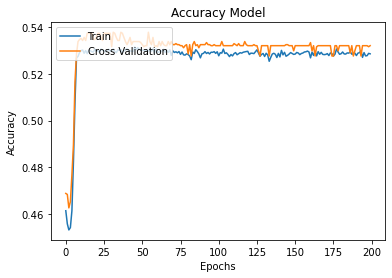

In [5]:
#See how the training went
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy Model")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(['Train', 'Cross Validation'], loc = 'upper left')
plt.show()

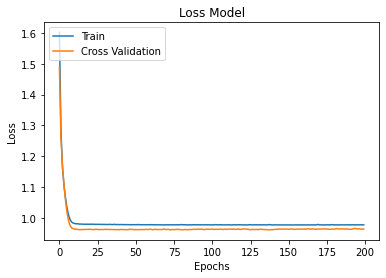

In [6]:
#See how the loss function went 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Train', 'Cross Validation'], loc = "upper left")
plt.show()

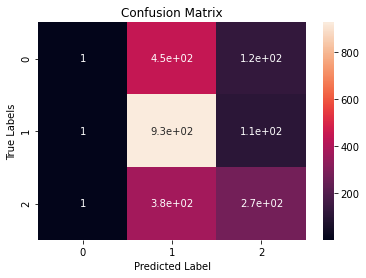

In [7]:
#Ploting the confusion matrix
from sklearn.metrics import confusion_matrix
ax = plt.subplot()
predict_results = model.predict(data_test)

predict_results = predict_results.argmax(axis = 1)
cm = confusion_matrix(test_labels1, predict_results)
sb.heatmap(cm, annot = True, ax = ax);
ax.set_xlabel('Predicted Label');
ax.set_ylabel("True Labels");
ax.set_title("Confusion Matrix");